In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
X = california_housing.data
Y = california_housing.target
columns = california_housing.feature_names 
df = pd.DataFrame(X, columns=columns)
df["Price"] = Y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
#Checking for missing values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


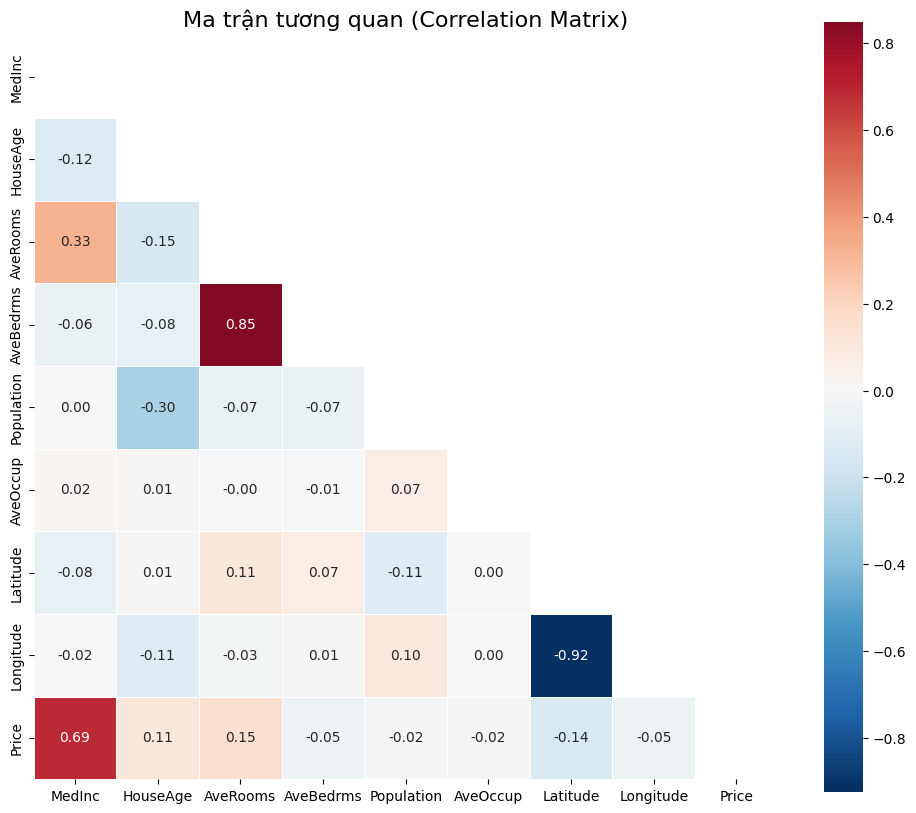

In [11]:
df.corr()
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), 
            mask=mask,           # Che nửa trên
            annot=True,          # Hiển thị số
            fmt=".2f",           # Làm tròn 2 số thập phân 
            cmap='RdBu_r',       # Đổi màu
            center=0,            # Lấy 0 làm trung tâm
            linewidths=0.5,      # Vạch ngăn cách các ô
            square=True)         # Ô hình vuông

plt.title("Ma trận tương quan (Correlation Matrix)", fontsize=16)
plt.show()

In [ ]:
#The feature Medinc is the most important reason for Price House


In [13]:
# Preprocessing Data   
from sklearn.model_selection import train_test_split
X = df.drop("Price", axis=1)
Y = df["Price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [28]:
#Modeling
from sklearn.linear_model import LinearRegression   
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

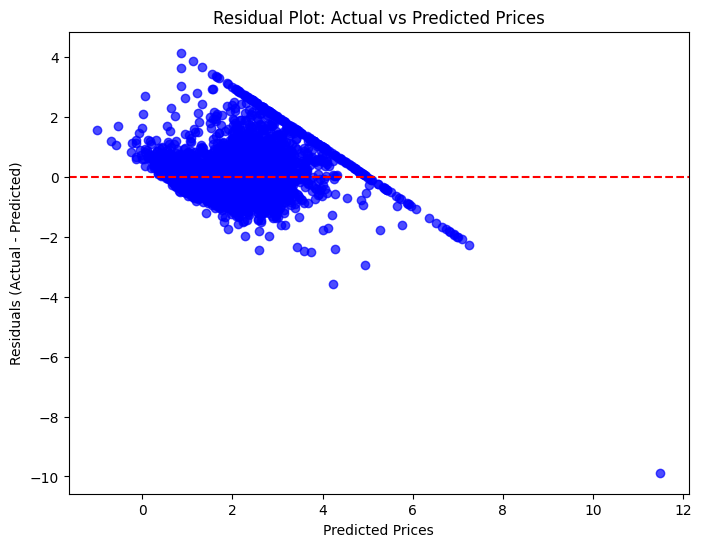

In [29]:
# Residual Plot for Linear Model
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, Y_test - Y_pred, alpha=0.7, c='blue')
plt.axhline(y=0, color='red', linestyle='--')  
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot: Actual vs Predicted Prices")
plt.show()


In [30]:
# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score   
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)   
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.5332001304956572
Mean Squared Error: 0.5558915986952437
R-squared: 0.5757877060324512


In [31]:
#Modeling
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred = rf_model.predict(X_test)   

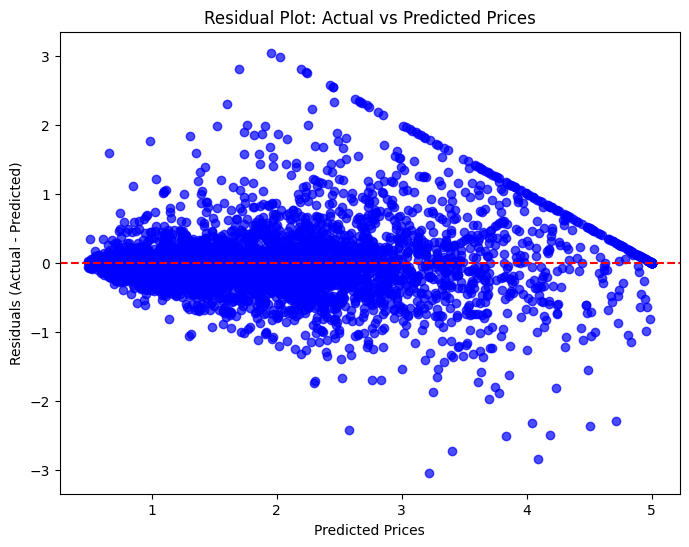

In [32]:
# Residual Plot for Random Forest Model
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, Y_test - Y_pred, alpha=0.7, c='blue')
plt.axhline(y=0, color='red', linestyle='--')  
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot: Actual vs Predicted Prices")
plt.show()

In [33]:
#Evaluation
mae = mean_absolute_error(Y_test, Y_pred)       
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)   
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.32754256845930246
Mean Squared Error: 0.2553684927247781
R-squared: 0.8051230593157366
